# Exploração dos Dados Coletados

In [ ]:
# Instalação de pacotes necessários
!pip install numpy seaborn pandas requests matplotlib gdown unzip scikit-learn pycaret bokeh geoviews

### Aqui abaixo no link está o dicionário de dados.
[Dicionário de Dados](https://docs.google.com/spreadsheets/d/1Zgqj_uRK1fG0wJQOHbfJ9MsjBoDjOD-bQyTVb-v7VlQ/edit?usp=sharing)

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np  # Biblioteca para manipulação de arrays multidimensionais
import pandas as pd  # Biblioteca para manipulação de dados em formato de tabela
import requests  # Biblioteca para fazer requisições HTTP
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Biblioteca para visualização de dados estatísticos


In [ ]:
!wget https://dadosabertos.poa.br/dataset/6ee76b32-a6b8-4822-9889-e44135cdd7a5/resource/5cc6b043-84aa-4841-a7d1-643948206c3b/download/websin.csv

--2024-02-05 00:05:26--  https://dadosabertos.poa.br/dataset/6ee76b32-a6b8-4822-9889-e44135cdd7a5/resource/5cc6b043-84aa-4841-a7d1-643948206c3b/download/websin.csv
Resolving dadosabertos.poa.br (dadosabertos.poa.br)... 200.169.22.37
Connecting to dadosabertos.poa.br (dadosabertos.poa.br)|200.169.22.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21830610 (21M) [text/csv]
Saving to: ‘websin.csv’

websin.csv          100%[===================>]  20.82M  69.3KB/s    in 3m 36s  

2024-02-05 00:09:03 (98.6 KB/s) - ‘websin.csv’ saved [21830610/21830610]



In [ ]:
!wget https://dadosabertos.poa.br/dataset/ddc7c320-d52a-469f-831a-921b30feb48c/resource/a46aaaca-8cc1-4082-aa78-ce9f859e2df5/download/cat_vitimas.csv

--2024-02-05 00:09:03--  https://dadosabertos.poa.br/dataset/ddc7c320-d52a-469f-831a-921b30feb48c/resource/a46aaaca-8cc1-4082-aa78-ce9f859e2df5/download/cat_vitimas.csv
Resolving dadosabertos.poa.br (dadosabertos.poa.br)... 200.169.22.37
Connecting to dadosabertos.poa.br (dadosabertos.poa.br)|200.169.22.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6551316 (6.2M) [text/csv]
Saving to: ‘cat_vitimas.csv’

cat_vitimas.csv     100%[===================>]   6.25M  78.7KB/s    in 62s     

2024-02-05 00:10:06 (104 KB/s) - ‘cat_vitimas.csv’ saved [6551316/6551316]



In [ ]:
# Lendo o arquivo CSV "websin.csv" e armazenando os dados em um DataFrame chamado "df"
# O parâmetro "sep=';'" indica que o separador de colunas no arquivo CSV é o ponto e vírgula
# O parâmetro "on_bad_lines='skip'" indica que as linhas com erros devem ser ignoradas
df = pd.read_csv(r"/content/websin.csv", sep=';', on_bad_lines='skip')

In [ ]:
df.columns

Index(['data_extracao', 'descricao', 'estado', 'complemento', 'implantacao',
       'logradouro_nome', 'num_inicial', 'num_final', 'defronte',
       'cruzamento_nome', 'lado', 'fluxo', 'local_de_instal', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
# Lê o arquivo CSV "cat_vitimas.csv" e armazena os dados em um DataFrame chamado "vit"
# O parâmetro "sep=';'" indica que o separador de colunas no arquivo CSV é o ponto e vírgula
# O parâmetro "on_bad_lines='skip'" indica que as linhas com erros devem ser ignoradas
vit = pd.read_csv(r"/content/cat_vitimas.csv", sep=';', on_bad_lines='skip')

In [ ]:
# Obtém as colunas do DataFrame vit
vit.columns

Index(['data_extracao', 'longitude', 'latitude', 'idacidente', 'data', 'hora',
       'idade', 'sexo', 'sit_vitima', 'log1', 'log2', 'predial1', 'regiao',
       'tipo_acid', 'auto', 'taxi', 'onibus_urb', 'onibus_met', 'onibus_int',
       'caminhao', 'moto', 'carroca', 'bicicleta', 'outro', 'lotacao',
       'dia_sem', 'periododia', 'fx_et', 'tipo_veic', 'consorcio'],
      dtype='object')

### Retirada de Dados de localização que foram imputados errados e outiliers

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np

# Supondo que df e vit são seus DataFrames

# Remover outliers

# Calcular os quartis para as colunas 'latitude' e 'longitude' do DataFrame df
Q1 = df[['latitude', 'longitude']].quantile(0.25)
Q3 = df[['latitude', 'longitude']].quantile(0.75)

# Calcular a amplitude interquartil (IQR)
IQR = Q3 - Q1

# Filtrar as linhas do DataFrame df que estão dentro do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
df = df[~((df[['latitude', 'longitude']] < (Q1 - 1.5 * IQR)) | (df[['latitude', 'longitude']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Calcular os quartis para as colunas 'latitude' e 'longitude' do DataFrame vit
Q1 = vit[['latitude', 'longitude']].quantile(0.25)
Q3 = vit[['latitude', 'longitude']].quantile(0.75)

# Calcular a amplitude interquartil (IQR)
IQR = Q3 - Q1

# Filtrar as linhas do DataFrame vit que estão dentro do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
vit = vit[~((vit[['latitude', 'longitude']] < (Q1 - 1.5 * IQR)) | (vit[['latitude', 'longitude']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remover NaN

# Remover as linhas do DataFrame df que possuem valores NaN nas colunas 'latitude' e 'longitude'
df = df.dropna(subset=['latitude', 'longitude'])

# Remover as linhas do DataFrame vit que possuem valores NaN nas colunas 'latitude' e 'longitude'
vit = vit.dropna(subset=['latitude', 'longitude'])

## **Plotagem do Grafico de Disperção no Mapa**


*   Pontos Azuis - Pontos que contém Sinalização Instalada
*   Pontos Vermelho - Pontos de contém Vítimas de Transito
*   Pontos Amarelos - Pontos que ocorreu vítimas e estão em uma distância aproximada de 50 metros ou mais da sinalização mais proxima

  ### **Porque 50 metros?**
  Referência
  
  https://www.gov.br/transportes/pt-br/assuntos/transito/arquivos-senatran/educacao/publicacoes/manual_vol_i_2.pdf

  Segundo manual do senatran

  "Nas vias rurais e urbanas de trânsito rápido, a não ser que o espaço existente seja muito limitado, recomenda-se manter uma distância mínima de **50 metros** entre placas, para permitir a leitura de todos os sinais, em função do tempo necessário para a percepção e reação dos condutores, especialmente quando são desenvolvidas velocidades elevadas."






In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import geoviews as gv
import geoviews.tile_sources as gts
from bokeh.io import show, output_notebook
from sklearn.neighbors import NearestNeighbors

# Limpar os dados removendo as linhas com valores NaN nas colunas 'latitude' e 'longitude'
df = df.dropna(subset=['latitude', 'longitude'])
vit = vit.dropna(subset=['latitude', 'longitude'])

# Criar um objeto NearestNeighbors para as placas
nbrs = NearestNeighbors(n_neighbors=1).fit(df[['latitude', 'longitude']])

# Encontrar a placa mais próxima para cada vítima
distances, indices = nbrs.kneighbors(vit[['latitude', 'longitude']])

# Definir a distância máxima para considerar uma vítima como "próxima" a uma placa
# 50 metros é aproximadamente igual a 0.0005 graus em latitude/longitude
max_distance = 0.0005

# Encontrar as vítimas que estão "longe" das placas
far_victims = vit[distances.flatten() > max_distance]

# Agrupar os pontos que têm a mesma latitude e longitude
df = df.groupby(['latitude', 'longitude']).first().reset_index()
vit = vit.groupby(['latitude', 'longitude']).first().reset_index()
far_victims = far_victims.groupby(['latitude', 'longitude']).first().reset_index()

# Criar um gráfico de dispersão no mapa para as placas com os pontos azuis
placas = gv.Points(df, ['longitude', 'latitude']).opts(color='blue', size=20, alpha=0.5)

# Criar um gráfico de dispersão no mapa para todas as vítimas com os pontos vermelhos
vitimas = gv.Points(vit, ['longitude', 'latitude']).opts(color='red', size=20, alpha=0.5)

# Criar um gráfico de dispersão no mapa para as vítimas que estão "longe" das placas com os pontos amarelos
far_vitimas = gv.Points(far_victims, ['longitude', 'latitude']).opts(color='yellow', size=20, alpha=0.5)

# Combinar os gráficos e adicionar um mapa base
mapa = gts.EsriImagery * placas * vitimas * far_vitimas

# Ajustar o tamanho do gráfico
mapa = mapa.opts(width=1300, height=800)

# Mostrar o gráfico
output_notebook()
show(gv.render(mapa))

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)


Numero de Total de Ocorrencia de Vítimas que estão em uma distância aproximada de 50 metros ou mais da sinalização mais proxima

In [ ]:
# Obter a quantidade de pontos amarelos
num_yellow_points = len(far_victims)

# Imprimir a quantidade de pontos amarelos
num_yellow_points

1933

### Cria matriz para fazer uma representação dos dados e calcular a correlação entre as duas matrizes


*   Faz um for para o data frame df que são as placas/sinalizações e cria a matriz (placas_matrix) - Pontos Azuis
*   Faz um for para o data frame far_victims que são as vítimas que estão em uma distância aproximada de 50 metros ou mais da sinalização mais proxima e cria a matriz (mortes_matrix) - Pontos Amarelos



In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
from scipy.stats import pearsonr

# Definir o tamanho da grade
grid_size = 0.01

# Criar uma grade regular sobre a área de interesse
lat_range = np.arange(df['latitude'].min(), df['latitude'].max(), grid_size)
lon_range = np.arange(df['longitude'].min(), df['longitude'].max(), grid_size)
grid = np.zeros((len(lat_range), len(lon_range)))

# Faz um for para o data frame df que são as placas/sinalizações e cria a matriz (placas_matrix) - Pontos Azuis
placas_matrix = np.zeros_like(grid)
for index, row in df.iterrows():
    i = int((row['latitude'] - df['latitude'].min()) / grid_size)
    j = int((row['longitude'] - df['longitude'].min()) / grid_size)
    placas_matrix[i, j] = 1

# Faz um for para o data frame far_victims que são as vítimas que estão em uma distância aproximada de 50 metros ou mais da sinalização mais proxima e cria a matriz (mortes_matrix) - Pontos Amarelos
mortes_matrix = np.zeros_like(grid)
for index, row in far_victims.iterrows():
    i = int((row['latitude'] - df['latitude'].min()) / grid_size)
    j = int((row['longitude'] - df['longitude'].min()) / grid_size)
    mortes_matrix[i, j] = 1

# Calcular a correlação entre as duas matrizes
correlation, _ = pearsonr(placas_matrix.flatten(), mortes_matrix.flatten())

print(f"A correlação entre a ausência de placas e o número de mortes é {correlation}")

# Calcular o valor-p para o coeficiente de correlação
_, p_value = pearsonr(placas_matrix.flatten(), mortes_matrix.flatten())

print(f"O valor-p para a correlação é {p_value}")


A correlação entre a ausência de placas e o número de mortes é 0.5901714930234674
O valor-p para a correlação é 2.9659879084850453e-35


## Correlação criando um modelo com o Pycaret

In [ ]:
# Importar a função 'setup' do módulo 'classification' do PyCaret
from pycaret.classification import *

# Criar um DataFrame que contém a presença/ausência de placas e mortes para cada célula da grade
data = pd.DataFrame({
    'placas': placas_matrix.flatten(),  # Coluna com a presença/ausência de placas
    'mortes': mortes_matrix.flatten()  # Coluna com a presença/ausência de mortes
})

# Inicializar o ambiente de modelagem em PyCaret
clf1 = setup(data, target='mortes')  # Definir a coluna 'mortes' como o alvo do modelo


,Description,Value
0,Session id,1494
1,Target,mortes
2,Target type,Binary
3,Original data shape,"(361, 2)"
4,Transformed data shape,"(361, 2)"
5,Transformed train set shape,"(252, 2)"
6,Transformed test set shape,"(109, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Comparar diferentes modelos para encontrar o melhor
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8294,0.8090,0.8812,0.8665,0.8681,0.6221,0.6390,0.4860
knn,K Neighbors Classifier,0.8294,0.8090,0.8812,0.8665,0.8681,0.6221,0.6390,0.0380
nb,Naive Bayes,0.8294,0.8090,0.8812,0.8665,0.8681,0.6221,0.6390,0.0240
dt,Decision Tree Classifier,0.8294,0.8090,0.8812,0.8665,0.8681,0.6221,0.6390,0.0240
ridge,Ridge Classifier,0.8294,0.0000,0.8812,0.8665,0.8681,0.6221,0.6390,0.0230
rf,Random Forest Classifier,0.8294,0.8090,0.8812,0.8665,0.8681,0.6221,0.6390,0.2970
qda,Quadratic Discriminant Analysis,0.8294,0.8090,0.8812,0.8665,0.8681,0.6221,0.6390,0.0260
ada,Ada Boost Classifier,0.8294,0.8090,0.8812,0.8665,0.8681,0.6221,0.6390,0.1020
gbc,Gradient Boosting Classifier,0.8294,0.8090,0.8812,0.8665,0.8681,0.6221,0.6390,0.0740
lda,Linear Discriminant Analysis,0.8294,0.8090,0.8812,0.8665,0.8681,0.6221,0.6390,0.0230


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Criar um modelo usando o melhor algoritmo
model = create_model('lr')  # Substitua 'lr' pelo ID do melhor modelo

# Avaliar o modelo
evaluate_model(model)

# Finalizar o modelo
final_model = finalize_model(model)

# Salvar o modelo
save_model(final_model, 'model')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8846,0.8333,1.0000,0.8500,0.9189,0.7234,0.7528
1,0.7692,0.7562,0.8125,0.8125,0.8125,0.5125,0.5125
2,0.8400,0.8021,0.9375,0.8333,0.8824,0.6350,0.6459
3,0.6800,0.6042,0.8750,0.7000,0.7778,0.2308,0.2500
4,0.9200,0.9132,0.9375,0.9375,0.9375,0.8264,0.8264
5,0.8000,0.8194,0.7500,0.9231,0.8276,0.5955,0.6138
6,0.8400,0.8750,0.7500,1.0000,0.8571,0.6835,0.7206
7,0.8400,0.7778,1.0000,0.8000,0.8889,0.6154,0.6667
8,0.8400,0.8264,0.8750,0.8750,0.8750,0.6528,0.6528


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['placas'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transforme...
                                                               keep_empty_features=False,
                          

In [ ]:
result = pull()
result

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8846,0.8333,1.0000,0.8500,0.9189,0.7234,0.7528
1,0.7692,0.7562,0.8125,0.8125,0.8125,0.5125,0.5125
2,0.8400,0.8021,0.9375,0.8333,0.8824,0.6350,0.6459
3,0.6800,0.6042,0.8750,0.7000,0.7778,0.2308,0.2500
4,0.9200,0.9132,0.9375,0.9375,0.9375,0.8264,0.8264
5,0.8000,0.8194,0.7500,0.9231,0.8276,0.5955,0.6138
6,0.8400,0.8750,0.7500,1.0000,0.8571,0.6835,0.7206
7,0.8400,0.7778,1.0000,0.8000,0.8889,0.6154,0.6667
8,0.8400,0.8264,0.8750,0.8750,0.8750,0.6528,0.6528


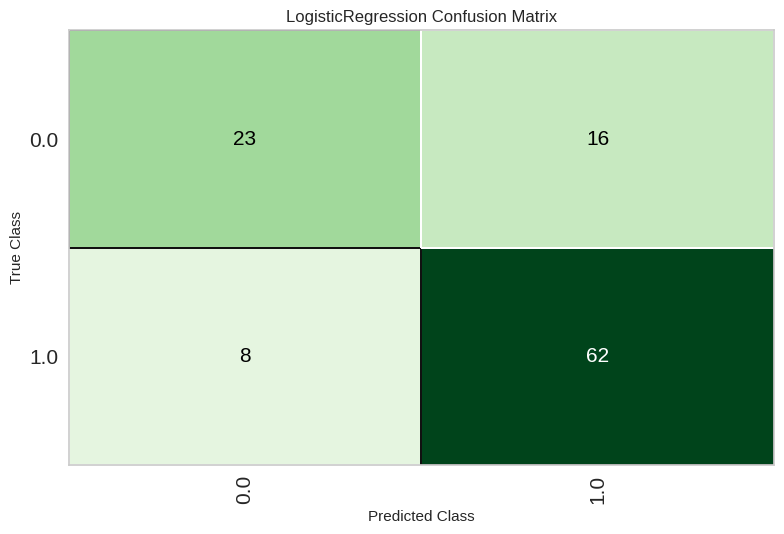

In [ ]:
# Criar um gráfico de matriz de confusão
plot_model(final_model, plot = 'confusion_matrix')

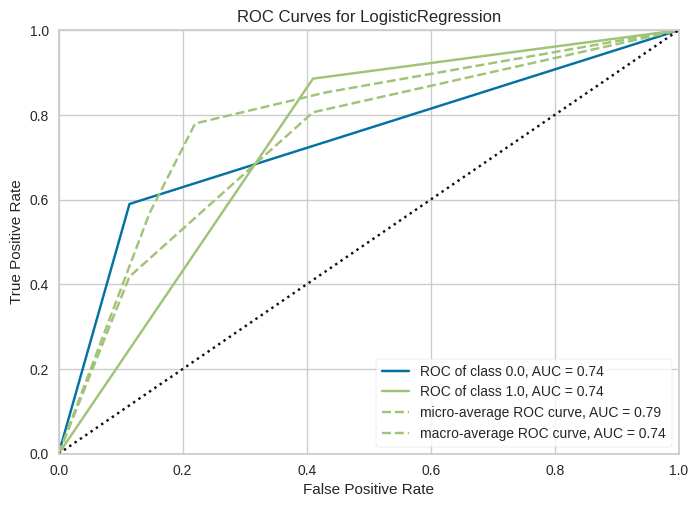

In [ ]:
# Criar um gráfico de curva ROC
plot_model(final_model, plot = 'auc')

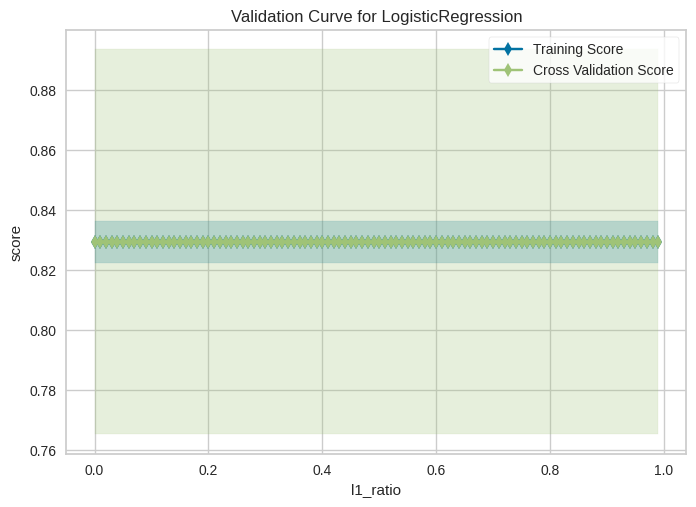

In [ ]:
# Criar um gráfico de validação cruzada
plot_model(final_model, plot = 'vc')

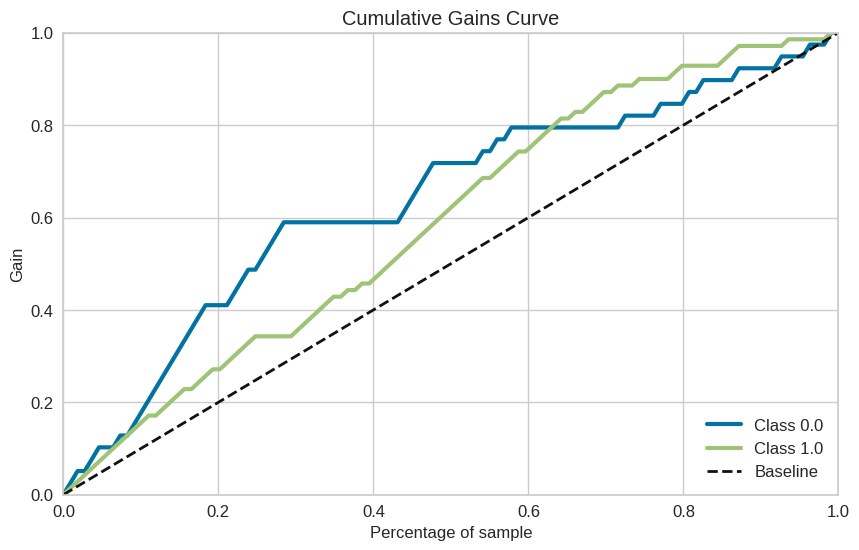

In [ ]:
# Criar um gráfico de ganho de elevação
plot_model(final_model, plot = 'gain')

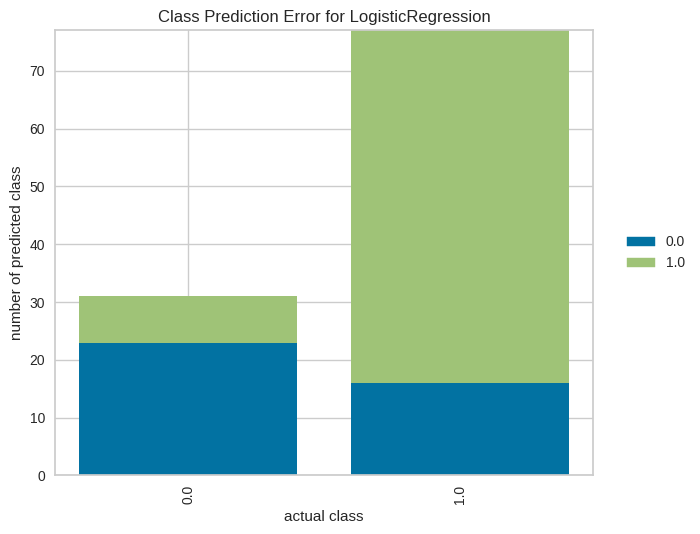

In [ ]:
# Plotar a curva de Gauss para os erros de regressão
plot_model(final_model, plot = 'error')

# Dados

In [ ]:
# Criar a coluna 'soma_vit' que é a soma das colunas especificadas
vit['soma_vit'] = vit[['auto', 'taxi', 'onibus_urb', 'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta', 'outro', 'lotacao']].sum(axis=1)

# Criar um novo DataFrame com as colunas 'data', 'regiao', 'tipo_acid' e 'soma_vit'
new_df = vit[['data', 'regiao', 'tipo_acid','auto', 'taxi', 'onibus_urb', 'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta', 'outro', 'lotacao', 'soma_vit']]

# Converter a coluna 'data' para datetime
new_df['data'] = pd.to_datetime(new_df['data'])

# Agora você pode extrair o ano
years = new_df['data'].dt.year.unique().tolist()

In [ ]:
from datetime import datetime

vit['data'] = pd.to_datetime(vit['data'])

# Supondo que 'vit' é o seu DataFrame
vit = vit.loc[vit['data'] != datetime.strptime('2202-12-26', '%Y-%m-%d')]

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

# Lista de opções para cada seleção
acid_types = ['Todos'] + new_df['tipo_acid'].unique().tolist()
regions = ['Todos'] + new_df['regiao'].unique().tolist()

# Widgets Dropdown
acid_type_widget = widgets.Dropdown(options=acid_types, description='Tipo de Acidente:')
region_widget = widgets.Dropdown(options=regions, description='Região:')

def plot_total_deaths_by_year(acid_type, region):
    # Filtrar o DataFrame
    if acid_type == 'Todos' and region == 'Todos':
        filtered_df = new_df
    elif acid_type == 'Todos':
        filtered_df = new_df[new_df['regiao'] == region]
    elif region == 'Todos':
        filtered_df = new_df[new_df['tipo_acid'] == acid_type]
    else:
        filtered_df = new_df[(new_df['tipo_acid'] == acid_type) & (new_df['regiao'] == region)]

    # Agrupar por ano e somar as vítimas
    grouped_df = filtered_df.groupby(new_df['data'].dt.year)['soma_vit'].sum()

    # Criar um gráfico de barras
    plt.figure(figsize=(10,6))
    bars = grouped_df.plot(kind='bar', color='red')  # Adicionado color='red'
    plt.xlabel('Ano')
    plt.ylabel('Número total de vítimas')
    plt.title('Número Total de Vítimas por Ano', fontweight='bold')  # Adicionado fontweight='bold'

    # Adicionar números em cima de cada barra
    for bar in bars.patches:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval + .05, round(yval, 2), ha='center', va='bottom', weight='bold')

    plt.show()

# Conectar os widgets aos parâmetros da função
interact(plot_total_deaths_by_year, acid_type=acid_type_widget, region=region_widget)

interactive(children=(Dropdown(description='Tipo de Acidente:', options=('Todos', 'ABALROAMENTO', 'NAO CADASTR…

<function __main__.plot_total_deaths_by_year(acid_type, region)>

In [ ]:
# Lista das colunas para somar
cols_to_sum = ['auto', 'taxi', 'onibus_urb', 'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta', 'outro', 'lotacao']

# Adicionar uma nova coluna 'total_vitimas' que é a soma das colunas especificadas para cada linha
vit['total_vitimas'] = vit[cols_to_sum].sum(axis=1)
total_vitimas = vit['total_vitimas'].sum()

In [ ]:
total_vitimas

22990

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Create a new column 'soma_vit' by summing up the specified columns for each row
far_victims['soma_vit'] = far_victims[['auto', 'taxi', 'onibus_urb', 'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta', 'outro', 'lotacao']].sum(axis=1)

# List of options for each selection
acid_types_far_victims = ['Todos'] + far_victims['tipo_acid'].unique().tolist()
regions_far_victims = ['Todos'] + far_victims['regiao'].unique().tolist()

# Widgets Dropdown
acid_type_widget_far_victims = widgets.Dropdown(options=acid_types_far_victims, description='Tipo de Acidente:')
region_widget_far_victims = widgets.Dropdown(options=regions_far_victims, description='Região:')
far_victims['data'] = pd.to_datetime(far_victims['data'])  # Adiciona esta linha para converter 'data' para o tipo datetime

def plot_total_deaths_by_year_far_victims(acid_type, region):
    # Filter the DataFrame
    if acid_type == 'Todos' and region == 'Todos':
        filtered_df = far_victims
    elif acid_type == 'Todos':
        filtered_df = far_victims[far_victims['regiao'] == region]
    elif region == 'Todos':
        filtered_df = far_victims[far_victims['tipo_acid'] == acid_type]
    else:
        filtered_df = far_victims[(far_victims['tipo_acid'] == acid_type) & (far_victims['regiao'] == region)]

    # Group by year and sum the victims
    grouped_df = filtered_df.groupby(filtered_df['data'].dt.year)['soma_vit'].sum()  # Modifica para usar filtered_df em vez de far_victims

    # Create a bar plot
    plt.figure(figsize=(10,6))
    bars = grouped_df.plot(kind='bar', color='yellow')  # Added color='yellow'
    plt.xlabel('Ano')
    plt.ylabel('Número total de vítimas')
    plt.title('Numero de Total de Ocorrencia de Vítimas que Estão a 50 Metros ou Mais da Sinalização Mais Proxima', fontweight='bold')  # Added fontweight='bold'

    # Add numbers on top of each bar
    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + .05, round(yval, 2), ha='center', va='bottom', weight='bold')

    plt.show()

# Connect the widgets to the function parameters
interact(plot_total_deaths_by_year_far_victims, acid_type=acid_type_widget_far_victims, region=region_widget_far_victims)



interactive(children=(Dropdown(description='Tipo de Acidente:', options=('Todos', 'ABALROAMENTO', 'NAO CADASTR…

<function __main__.plot_total_deaths_by_year_far_victims(acid_type, region)>

In [ ]:
# Lista das colunas para somar
cols_to_sum = ['auto', 'taxi', 'onibus_urb', 'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta', 'outro', 'lotacao']

# Adicionar uma nova coluna 'total_vitimas_longe_de_placas' que é a soma das colunas especificadas para cada linha
far_victims['total_vitimas_longe_de_placas'] = far_victims[cols_to_sum].sum(axis=1)
total_vitimas_longe_de_placas = far_victims['total_vitimas_longe_de_placas'].sum()

In [ ]:
total_vitimas_longe_de_placas

3356

In [ ]:
# Calcular a porcentagem
percent = total_vitimas_longe_de_placas / total_vitimas

# Imprimir a porcentagem
print(f"A porcentagem de vítimas que estão longe das placas é {percent * 100:.2f}%")

A porcentagem de vítimas que estão longe das placas é 14.60%
